Machine Learning 1
Daniel Kasakula
Logistic Regression Practice

# Logistic-Regression Practice

We will use a version of the famous Titanic data set that requires very little cleaning.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import files
files.upload()


Saving titanic_data.csv to titanic_data.csv


{'titanic_data.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C1

Read in the data set.

In [ ]:
t_df = pd.read_csv('titanic_data.csv', index_col='PassengerId')
t_df = t_df.dropna()

Remove columns that don't make reasonable numeric predictors.

In [ ]:
t_df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

Convert the remaining columns to use numeric labels.

In [ ]:
t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
t_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

<ipython-input-4-f58061677c28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
<ipython-input-4-f58061677c28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
<ipython-input-4

Extract the dependent and independent variables.

In [ ]:
X = t_df.drop(columns=['Survived'])
y = t_df['Survived']

Split training and test sets.

Notice that we are  _practicing to learn_, not creating a product, so we have not paid attention to validation vs. test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print("Dataset Sizes:")
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Examine the first few rows of training and test sets
print("X_train sample:")
print(X_train.head())
print("\ny_train sample:")
print(y_train.head())
print("\nX_test sample:")
print(X_test.head())
print("\ny_test sample:")
print(y_test.head())

# Check if the column names are as expected
print("\nX_train Columns:", X_train.columns)
print("X_test Columns:", X_test.columns)

# Check value ranges for categorical variables
print("\nUnique values in 'Sex' (X_train):", X_train['Sex'].unique())
print("Unique values in 'Embarked' (X_train):", X_train['Embarked'].unique())

# Check the distribution of the target variable
print("\nTraining set target distribution:")
print(y_train.value_counts())
print("\nTest set target distribution:")
print(y_test.value_counts())

# Check total size matches original dataset
print("\nTotal samples checked:")
print(f"Train + Test: {len(X_train) + len(X_test)}, Original: {len(t_df)}")

Dataset Sizes:
Training set: X_train: (128, 7), y_train: (128,)
Test set: X_test: (55, 7), y_test: (55,)
X_train sample:
             Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
PassengerId                                                     
764               1    0  36.0      1      2  120.0000         0
592               1    0  52.0      1      0   78.2667         1
572               1    0  53.0      2      0   51.4792         0
138               1    1  37.0      1      0   53.1000         0
63                1    1  45.0      1      0   83.4750         0

y_train sample:
PassengerId
764    1
592    1
572    1
138    0
63     0
Name: Survived, dtype: int64

X_test sample:
             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
371               1    1  25.0      1      0  55.4417         1
332               1    1  45.5      0      0  28.5000         0
807               1    1  39.0      0      0   0.

### Run everything up to this point and check the variable explorer for the following.
#### Do you have distinct training and test sets for the independent and dependent variables? Put the answer in your Jupyter notebook. Include the sizes of the sets in cardinality and percentage.

Training set has 128 samples about 70 % of the smaple size, testing set has 55 samplesabout 30% of the smaple size.

#### Look at the two training sets and at least one test set to verify they contain what you expect.
Are there any issues? Put the answer in your Jupyter notebook. Include an explanation or discussion if necessary.

I did not notice any issues


In [ ]:
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)
print(logmodel.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  128
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            7
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.3075
Time:                        02:08:30   Log-Likelihood:                -54.492
converged:                       True   LL-Null:                       -78.692
Covariance Type:            nonrobust   LLR p-value:                 2.972e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5822      1.359      3.372      0.001       1.919       7.246
Pclass        -0.6968      0.475     -1.466      0.143      -1.628       0.235
Sex           -2.4549      0.548     -4.478      0.0

### Are there any predictors that are not statistically significant in the conventional sense?
Put the answer in your Jupyter notebook.<p>
A variable is conventionally statistically significant if its _p_ value is less than 0.05. (Do you know why?)

To determine which predictors are not statistically significant, we look at the p-values from the logistic regression model's summary. A predictor is considered statistically significant in the conventional sense if its p-value is less than 0.05
Sex (p = 0.000).
Non-significant predictors: Pclass, SibSp, Parch, Fare, Embarked.
Predictors with high p-values (> 0.05) do not have enough evidence to suggest they contribute meaningfully to predicting survival, given the presence of other variables in the model. While they might not be significant in this model, they could still be useful in other contexts or with a different feature set

### What variable is particularly strong in predicting survival?
Put the answer in your Jupyter notebook.

"Sex" is a particularly strong predictor, with males less likely to survive

### What does a negative coefficient imply and why?
Put the answer in your Jupyter notebook.

a negative coefficient implies:
1. An increase in the predictor decreases the log-odds.
2. the probability of the event, in this case, the survival is less likely as the predictor increases

### Based on your discussion, first think about what other variable ought to be a decent predictor?

Age ought to be a decent predictor


### Next, check the report output to see if that was the case.
Enter what variable you thought might be a good predictor and whether that turned out to be the case.

Age (p=0.09), yes turns out that Age is a good predictor. this might be related to the fact the the older the person was, the less likely they were to survive.

## Next, we wil learn about the quality of our predictions on the test set.

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

# Form our predictions, convert continuous [0, 1] predictions to binary
predictions = logmodel.predict(X_test)
#predictions = logmodel.predict(sm.add_constant(X_test))
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]

# We can now assess the accuracy and print out the confusion matrix
print(accuracy_score(y_test, bin_predictions))
print(confusion_matrix(y_test, bin_predictions))

0.7636363636363637
[[12  7]
 [ 6 30]]


0.7636363636363637 is the accuracy of the model, which tells the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions. An accuracy of 0.7636 means the model correctly predicted the outcome about 76.36% of the time.

The confusion matrix is a more detailed way of evaluating the performance of the classifier. It shows the breakdown of predicted versus actual classifications in a 2x2 matrix for binary classification.
[[True Negative, False Positive],
 [False Negative, True Positive]]
True Positives (TP) = 30: the modelcorrectly predicted 30 instances where the actual class was 1.
True Negatives (TN) = 12: the model correctly predicted 12 instances where the actual class was 0.
False Positives (FP) = 7: the model incorrectly predicted 7 instances as 1 when the actual class was 0.
False Negatives (FN) = 6: the model incorrectly predicted 6 instances as 0 when the actual class was 1.

## Discussion

### There is another way to evaluate our model... for a variety of thresholds.

Text(0, 0.5, 'True Positive Rate')

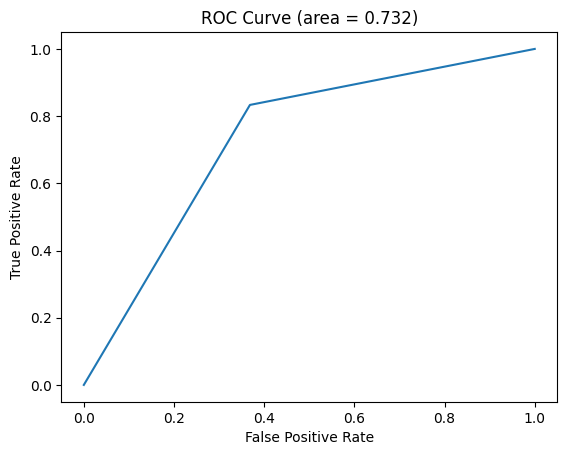

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

predictions_prob = logmodel.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')